In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 영화리뷰 분석
---
- IMDB 데이터 활용



## [1] 데이터 준비

In [2]:
from tensorflow.keras.datasets.imdb import load_data
import numpy as np

In [3]:
imData = load_data()

In [4]:
(X_train, y_train), (X_test,y_test) = load_data()

In [5]:
print(f'imDB 정보')
print(f'X_train: {X_train.shape}, y_tria n: {y_train.shape}')
print(f'X_test : {X_test.shape},  y_test:{y_test.shape}')

imD 정보
X_train: (25000,), y_tria n: (25000,)
X_test : (25000,),  y_test:(25000,)


In [6]:
for idx in range(3):
  print(f'{idx} - {y_train[idx]}')
  print(X_train[idx])

0 - 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1 - 0
[1, 194, 1153, 194, 8255

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)

In [7]:
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [8]:
tokenizer = text.Tokenizer()

리뷰 글자 개수: 25000
리뷰 글자 개수 (중복제거): 1008
리뷰 글자 수 종류: {11, 12, 13, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

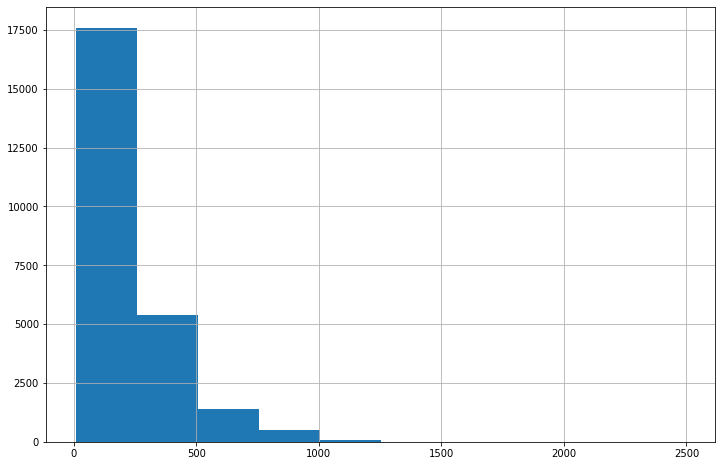

In [9]:
count =[]
for i in X_train:
  count.append(len(i))
print('리뷰 글자 개수:',len(count))
print('리뷰 글자 개수 (중복제거):',len(set(count)))
print('리뷰 글자 수 종류:',set(count))
plt.figure(figsize=(12,8))
plt.hist(count)
plt.grid()
plt.show()

In [10]:
# [2-1] 데이터별 길이 결정 : 300개
train_seq = pad_sequences(X_train,maxlen=300)
train_seq.shape

(25000, 300)

In [11]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.utils import to_categorical

In [12]:
# 단어가 300 이상인 데이터 개수
over=[]
for i in count:
  if i > 300:
    over.append(i)
len(over)

5908

In [13]:
# 단어가 400 이상인 데이터 개수
over=[]
for i in count:
  if i > 400:
    over.append(i)
len(over)

3484